<a href="https://colab.research.google.com/github/benvictoria17/pandas/blob/master/whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
import numpy as np

In [36]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Whatsapp_chat.csv', index_col=0)
data

,hours,days,months,names,timestamp
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19
...,...,...,...,...,...
51570,19,12,August,Person3,2020-08-12
51571,19,12,August,Person1,2020-08-12
51572,20,12,August,Person3,2020-08-12
51573,21,12,August,Person1,2020-08-12


In [37]:
data.groupby('names').count()

,hours,days,months,timestamp
names,,,,
Person1,17543,17543,17543,17543
Person2,3835,3835,3835,3835
Person3,13514,13514,13514,13514
Person4,16683,16683,16683,16683


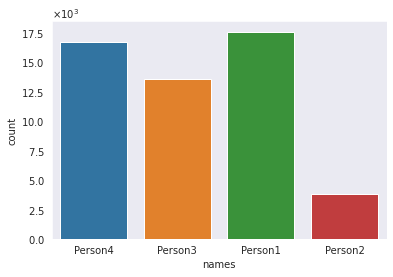

In [38]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((3,3))
sns.countplot(x='names', data=data).yaxis.set_major_formatter(formatter) #shows how many messages that every person sent 

In [39]:
data_temp = data['names'].value_counts()
data_temp

Person1    17543
Person4    16683
Person3    13514
Person2     3835
Name: names, dtype: int64

[Text(0, 0.5, 'message ratios')]

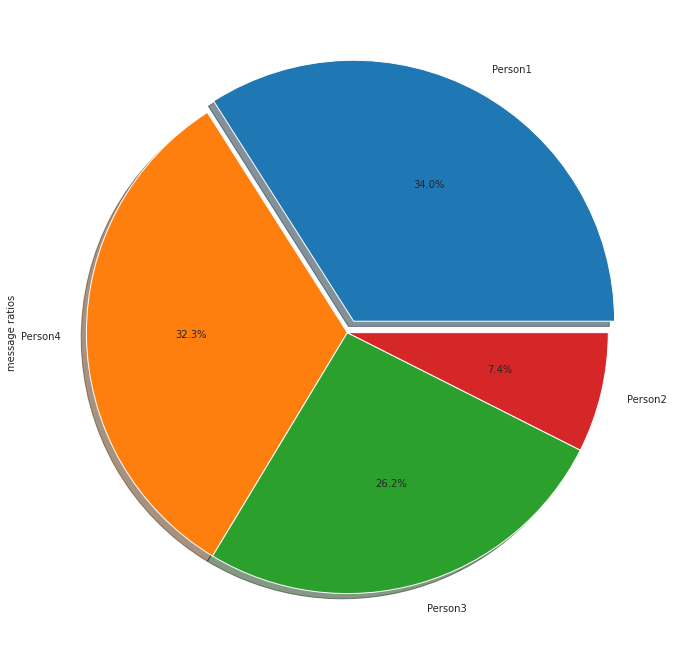

In [40]:
data_temp.plot.pie(figsize=(12,12), legend=False, autopct='%1.1f%%', shadow=True, explode=(0.05, 0, 0, 0)).set(ylabel='message ratios')

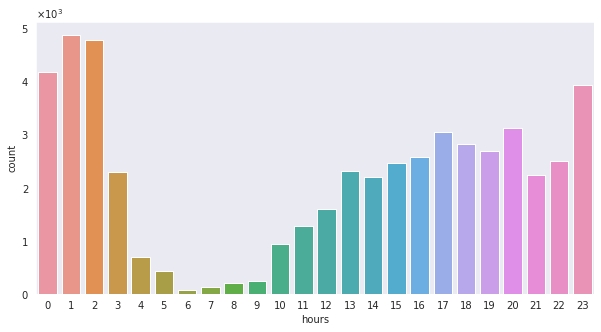

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='hours', data=data).yaxis.set_major_formatter(formatter) #shows distribution among hours of a day

In [42]:
data_by_date = data.groupby(['months', 'days']).count()
data_by_date

hours  names  timestamp
months days                         
August 1      1299   1299       1299
       2      1334   1334       1334
       3       398    398        398
       4       576    576        576
       5       358    358        358
...            ...    ...        ...
May    27      423    423        423
       28      541    541        541
       29      175    175        175
       30     1418   1418       1418
       31      434    434        434

[83 rows x 3 columns]

[Text(0.5, 1.0, 'Message Density of Each Day')]

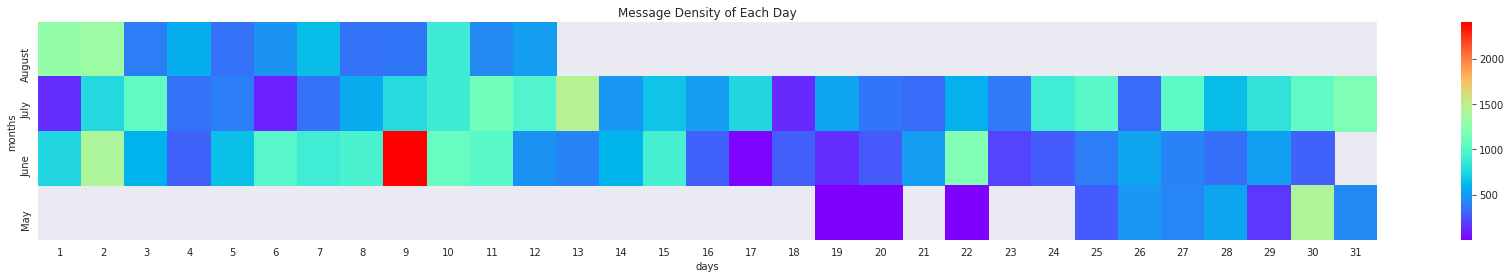

In [43]:
data_heat = data_by_date.pivot_table(values='hours', index='months', columns='days')
plt.figure(figsize=(30,4))
sns.heatmap(data_heat, cmap='rainbow').set(title='Message Density of Each Day')

In [44]:
data_by_timestamp = data[['timestamp', 'names']].value_counts().unstack(level=1).fillna(0) #groups data frame by timestamp and shows how many messages are sent by each person
data_by_timestamp

names,Person1,Person2,Person3,Person4
timestamp,,,,
2020-05-19,5.0,0.0,3.0,1.0
2020-05-20,0.0,1.0,0.0,0.0
2020-05-22,4.0,0.0,0.0,0.0
2020-05-25,128.0,7.0,46.0,105.0
2020-05-26,200.0,7.0,145.0,144.0
...,...,...,...,...
2020-08-08,125.0,1.0,84.0,150.0
2020-08-09,82.0,5.0,129.0,153.0
2020-08-10,309.0,58.0,241.0,288.0


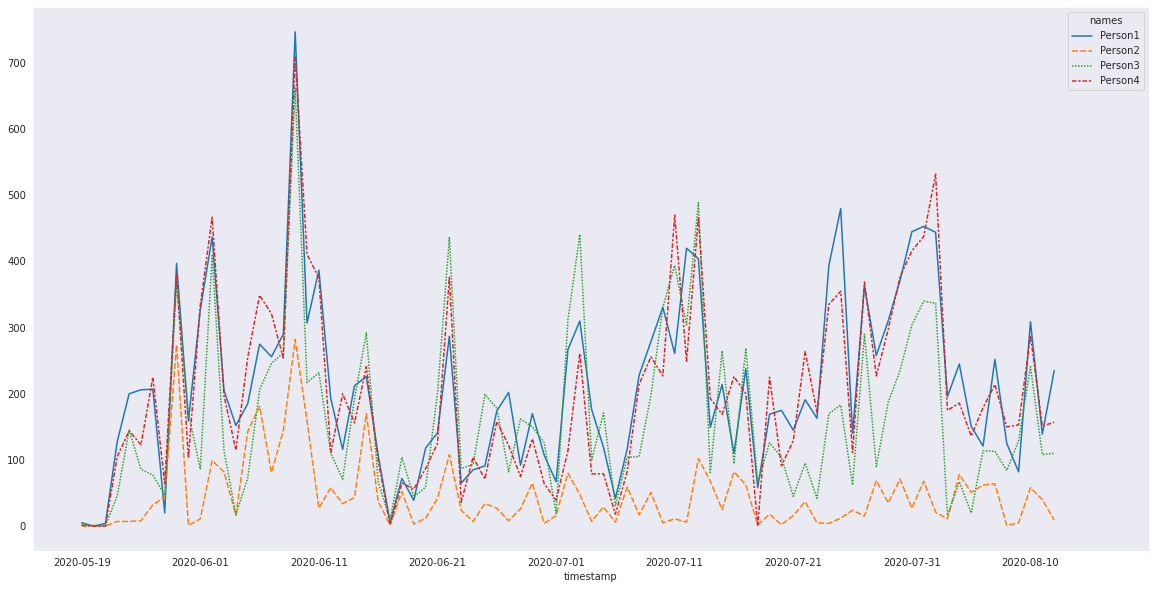

In [45]:
plt.figure(figsize=(20,10))
'''ax = sns.lineplot(data=data_by_timestamp["Person1"])
ax = sns.lineplot(data=data_by_timestamp["Person2"])
ax = sns.lineplot(data=data_by_timestamp["Person3"])
ax = sns.lineplot(data=data_by_timestamp["Person4"])'''
ax = sns.lineplot(data=data_by_timestamp)
ax.xaxis.set_ticks(np.arange(0, 100, 10))
ax

In [47]:
data_streaks = pd.DataFrame({'Name Pairs':name_pair_list, 'Streak Counts':streak_list, 'Time Interval':time_interval_list, 'Timestamp':date_list})
data_streaks.sort_values(by='Streak Counts', ascending=False)

,Name Pairs,Streak Counts,Time Interval,Timestamp
